# Chapter 12 



# OpenCV IO and Drawing  


## Read Image files 



## Display Image files 


## Write image files  


## Colors

In [1]:
# define color constants
# BGR format
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)
RED = (0, 0, 255)
YELLOW = (0, 255, 255)
MAGENTA = (255, 0, 255)
CYAN = (255, 255, 0)
DARK_GRAY = (50, 50, 50)
LIGHT_GRAY = (150, 150, 150)


In [2]:
# define a dictionary
colors = {
    'BLUE': (255, 0, 0),
    'GREEN': (0, 255, 0),
    'RED': (0, 0, 255),
    'YELLOW': (0, 255, 255),
    'MAGENTA': (255, 0, 255),
    'CYAN': (255, 255, 0),
    'DARK_GRAY': (50, 50, 50),
    'LIGHT_GRAY': (200, 200, 200),
}


## Draw Shapes

### Draw line
Drawing an image of color lines

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# can display by either matplotlib or cv2
show_by_matplotlib = 0

# create the image (canvas)
img = np.zeros((500, 500, 3), dtype='uint8')

# variable to determine distance between lines
separation = 40

# iterate through colors dictionary
for k,v in colors.items():
    # create points
    pt1 = (0, separation)
    pt2 = (500, separation)
    # draw line joining 2 points
    cv.line(img, pt1, pt2, v, 10)
    # move to next line
    separation += 40

if show_by_matplotlib == 1:
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(imgRGB)
    plt.show()
else:    
    cv.imshow("Color line", img)
    k = cv.waitKey(0)
    cv.destroyAllWindows()


### Define a Canvas
To draw any shape you need a canvas.  

Define a function to create a canvas of black background.


In [4]:
import numpy as np

def create_canvas(height=500, width=500, bgColor=0):
    # create the image (canvas)
    canvas = np.zeros((height, width, 3), dtype='uint8')
    if bgColor != 0:
        canvas[:] = bgColor
    return canvas

def show_in_matplotlib(img, figsize=(6,8)):
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    
    plt.imshow(imgRGB)
    plt.show()


#### Draw a canvas with light-gray background.

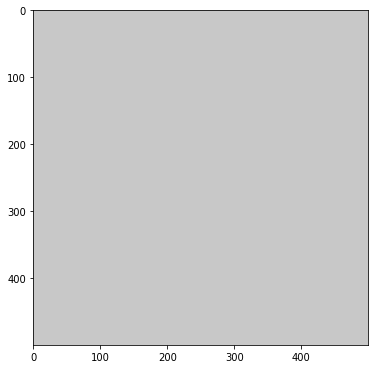

In [5]:
import matplotlib.pyplot as plt

canvas = create_canvas(bgColor=colors['LIGHT_GRAY'])

plt.figure(figsize=(6,8))
plt.imshow(canvas)
plt.show()

#### Drawing lines

`img = line(img, pt1, pt2, color, thickness=1, lineType=8, shift=0)`

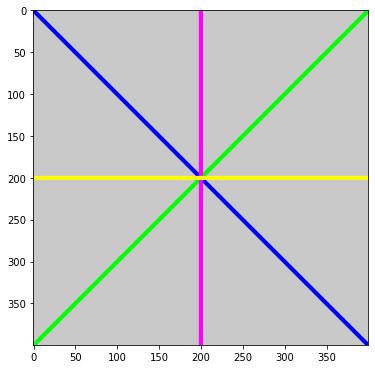

In [6]:
import matplotlib.pyplot as plt
import cv2 as cv


canvas = create_canvas(height=400, width=400, bgColor=colors['LIGHT_GRAY'])

# draw lines on the canvas
cv.line(canvas, (0,0), (400,400), colors['BLUE'], 3)
cv.line(canvas, (0,400), (400,0), colors['GREEN'], 3)
cv.line(canvas, (200,0), (200,400), colors['MAGENTA'], 3)
cv.line(canvas, (0,200), (400,200), colors['YELLOW'], 3)

show_in_matplotlib(canvas)

### Draw Rectangle

`img = rectangle(img, pt1, pt2, color, thickness=1, lineType=8, shift=0)` 
Note negative thickness means fill

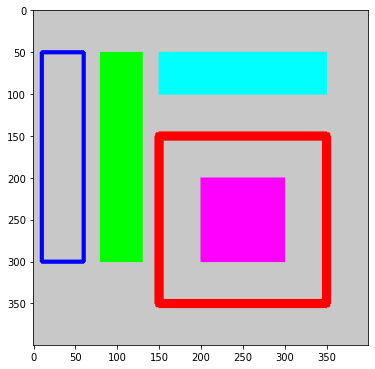

In [7]:
import matplotlib.pyplot as plt
import cv2 as cv


canvas = create_canvas(height=400, width=400, bgColor=colors['LIGHT_GRAY'])

# draw lines on the canvas
cv.rectangle(canvas, (10,50), (60,300), colors['BLUE'], 3)
cv.rectangle(canvas, (80, 50), (130, 300), colors['GREEN'], -1)
cv.rectangle(canvas, (150, 50), (350, 100), colors['CYAN'], -1)
cv.rectangle(canvas, (150, 150), (350, 350), colors['RED'], 10)
cv.rectangle(canvas, (200, 200), (300, 300), colors['MAGENTA'], -1)

show_in_matplotlib(canvas)

### Draw a circle

`img = circle(img, center, radius, color, thickness=1, lineType=8, shift=0)`


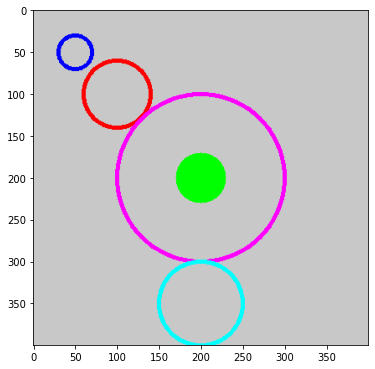

In [8]:
import matplotlib.pyplot as plt
import cv2 as cv


canvas = create_canvas(height=400, width=400, bgColor=colors['LIGHT_GRAY'])

# draw circles on the canvas
cv.circle(canvas, (50, 50), 20, colors['BLUE'], 3)
cv.circle(canvas, (100, 100), 40, colors['RED'], 3)
cv.circle(canvas, (200, 200), 100, colors['MAGENTA'], 3)
cv.circle(canvas, (200, 200), 30, colors['GREEN'], -1)
cv.circle(canvas, (200, 350), 50, colors['CYAN'], 3)

show_in_matplotlib(canvas)

### Draw Elipse

`cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color, thickness=1, lineType=8, shift=0)`

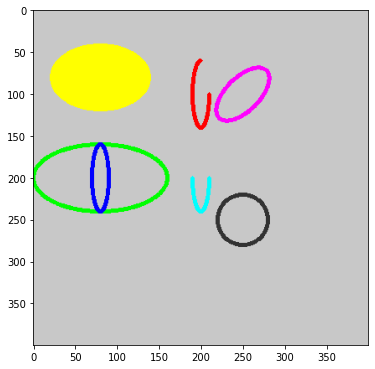

In [9]:
import matplotlib.pyplot as plt
import cv2 as cv


image = create_canvas(height=400, width=400, bgColor=colors['LIGHT_GRAY'])

# draw lines on the canvas
cv.ellipse(image, (80, 80), (60, 40), 0, 0, 360, colors['YELLOW'], -1)
cv.ellipse(image, (80, 200), (80, 40), 0, 0, 360, colors['GREEN'], 3)
cv.ellipse(image, (80, 200), (10, 40), 0, 0, 360, colors['BLUE'], 3)
cv.ellipse(image, (200, 200), (10, 40), 0, 0, 180, colors['CYAN'], 3)
cv.ellipse(image, (200, 100), (10, 40), 0, 0, 270, colors['RED'], 3)
cv.ellipse(image, (250, 250), (30, 30), 0, 0, 360, colors['DARK_GRAY'], 3)
cv.ellipse(image, (250, 100), (20, 40), 45, 0, 360, colors['MAGENTA'], 3)

show_in_matplotlib(image)

### Draw Polygons

`cv2.polylines(img, pts, isClosed, color, thickness=1, lineType=8, shift=0)`

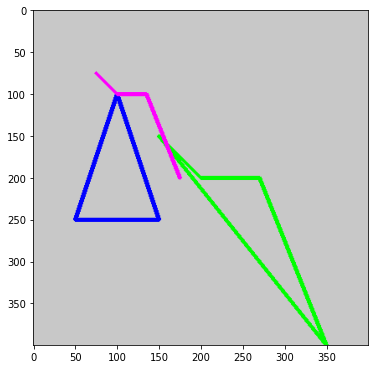

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


img = create_canvas(height=400, width=400, bgColor=colors['LIGHT_GRAY'])

pts = np.array([[50,250],[100,100],[150,250]], np.int32)
pts = pts.reshape((-1, 1, 2))
# draw triangle
cv.polylines(img, [pts], True, colors['BLUE'], 3)

pts = np.array([[150,150],[200,200], [270,200],[350,400]], np.int32)
pts = pts.reshape((-1, 1, 2))
# draw triangle
cv.polylines(img, [pts], True, colors['GREEN'], 3)

pts = np.array([[150,150], [200,200], [270,200], [350,400]])
pts = np.int32((pts * 0.5))
pts = pts.reshape((-1, 1, 2))
# draw triangle
cv.polylines(img, [pts], False, colors['MAGENTA'], 3)


show_in_matplotlib(img)

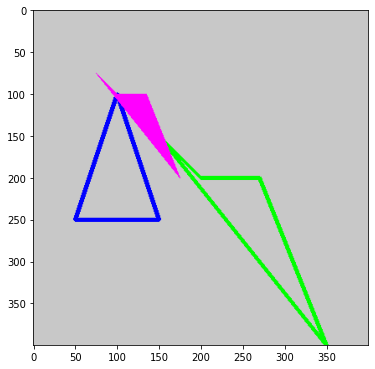

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


img = create_canvas(height=400, width=400, bgColor=colors['LIGHT_GRAY'])

pts = np.array([[50,250],[100,100],[150,250]], np.int32)
# pts = pts.reshape((-1, 1, 2))
# draw triangle
cv.polylines(img, [pts], True, colors['BLUE'], 3)

pts = np.array([[150,150],[200,200], [270,200],[350,400]], np.int32)
# pts = pts.reshape((-1, 1, 2))
# draw triangle
cv.polylines(img, [pts], True, colors['GREEN'], 3)

pts = np.array([[150,150], [200,200], [270,200], [350,400]])
pts = np.int32((pts * 0.5))
# pts = pts.reshape((-1, 1, 2))
# draw triangle
cv.fillPoly(img, [pts], colors['MAGENTA'])


show_in_matplotlib(img)

In [16]:
pts

array([[[ 75,  75]],

       [[100, 100]],

       [[135, 100]],

       [[175, 200]]])

### Draw a text

`img = cv.putText( img, text, org, fontFace, fontScale, color, thickness=1, lineType= 8, shift=0)`

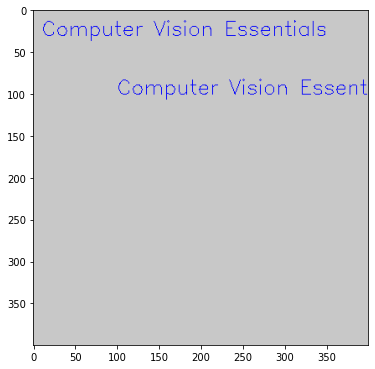

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


image = create_canvas(height=400, width=400, bgColor=colors['LIGHT_GRAY'])

cv.putText(image, 'Computer Vision Essentials', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 0.8, colors['BLUE'])
cv.putText(image, 'Computer Vision Essentials', (100, 100), cv.FONT_HERSHEY_SIMPLEX, 0.8, colors['BLUE'])

show_in_matplotlib(image)

## Class Activity
Write your name at the center of the canvas.